In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from six.moves import xrange
import matplotlib.pyplot as plt
%matplotlib inline
import pdb

#pdb.set_trace()
data = pd.read_csv('HR_comma_sep.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [28]:
left = data.groupby('left')

In [25]:
#left.count().index.values
left.count()['satisfaction_level']

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

<BarContainer object of 2 artists>

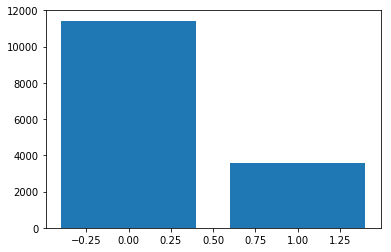

In [32]:
#left.tail()
plt.bar(left.count().index.values,left.count()['promotion_last_5years'])


In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [39]:
data.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [40]:
nb_projects = data.groupby('number_project').count()

Text(0.5,0,'Nb projects')

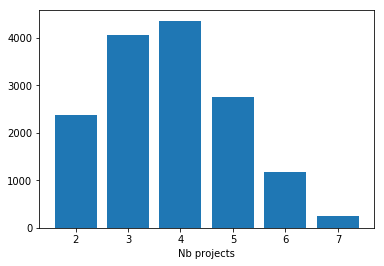

In [46]:
plt.bar(nb_projects.index.values,nb_projects['last_evaluation'])
plt.xlabel('Nb projects')

In [45]:
nb_projects

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
number_project,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


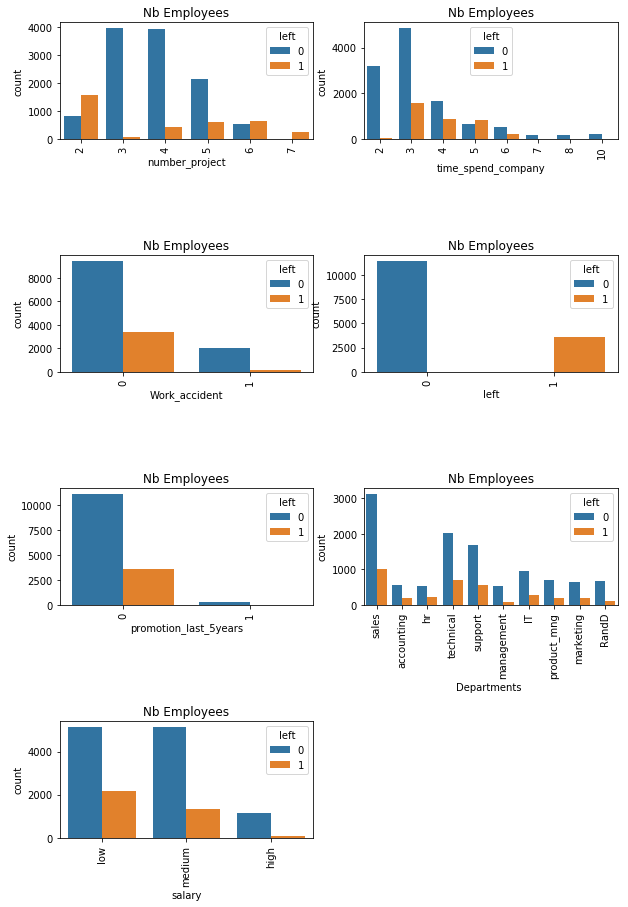

In [51]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']

fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1)
    plt.xticks(rotation=90)
    plt.title('Nb Employees')
    sns.countplot(x=j, data=data, hue='left')



In [55]:
left_employees = data[['satisfaction_level','last_evaluation']][data.left==1]

In [65]:
from sklearn.cluster import KMeans 

cluster = KMeans(n_clusters=3,random_state=0).fit(left_employees)

In [67]:
left_employees['labels'] = cluster.labels_

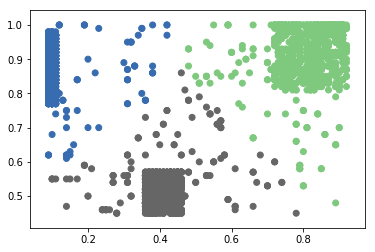

In [69]:
plt.scatter(left_employees['satisfaction_level'], left_employees['last_evaluation'],
            c=left_employees['labels'], cmap='Accent')

In [86]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

In [87]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
      'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier()

In [90]:
gd.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [91]:
y_predict = gd.predict(X_test)

In [95]:
from sklearn import metrics

print('accuracy : {}'.format(metrics.precision_score(y_test, y_predict)))

accuracy : 0.958252427184466


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      3428
          1       0.96      0.92      0.94      1072

avg / total       0.97      0.97      0.97      4500

